In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')


In [7]:
data=pd.read_csv("winequality-red.csv")

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


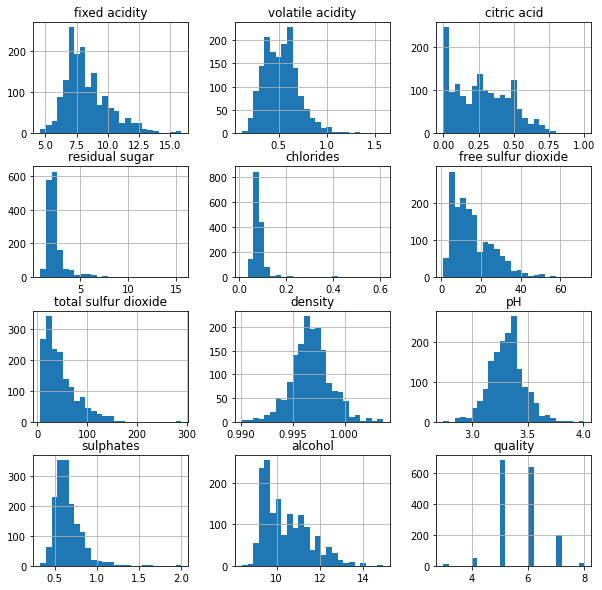

In [12]:
#Visualization of data

data.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

Above image reveals that how that data is easily distributed on features.

Now, we plot the bar graph in which we check what value of alcohol can able to make changes in quality.

Text(0, 0.5, 'alcohol')

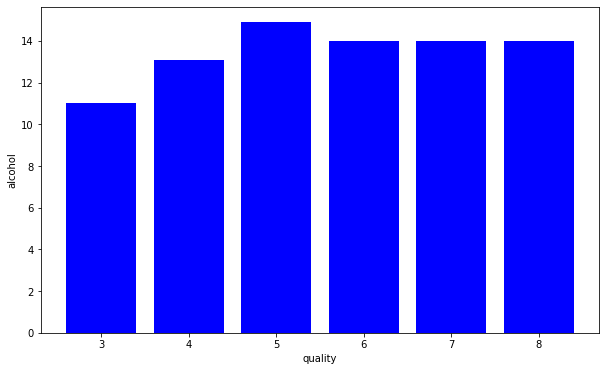

In [13]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(data['quality'],data['alcohol'],color='blue')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

we will perform a correlation on the data to see how many features are there they correlated to each other.

we use a statistical method that finds the bonding and relationship between two features.

<AxesSubplot:>

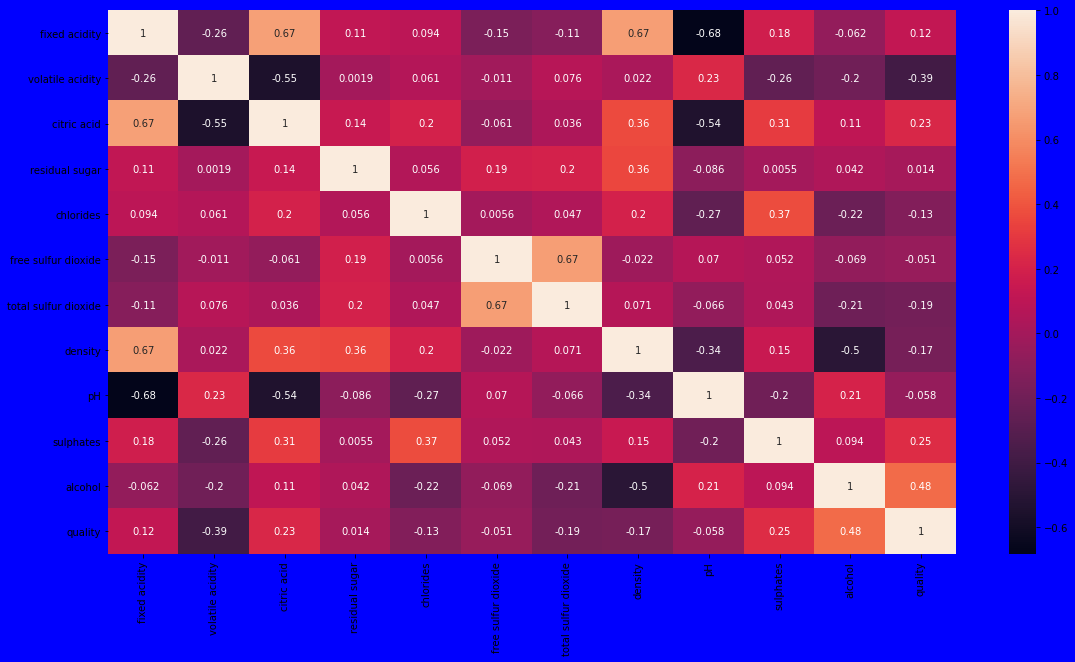

In [14]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='blue')
sb.heatmap(data.corr(),annot=True)

we have to find those features that are fully correlated to each other by this we reduce the number of features from the data.

If you think that why we have to discard those correlated, because relationship among them is equal they equally impact on model accuracy so, we delete one of them.

In [15]:
for a in range(len(data.corr().columns)):
    for b in range(a):
        if abs(data.corr().iloc[a,b]) >0.7:
            name = data.corr().columns[a]
            print(name)

 we find those features whose correlation number is high, as you see in the program we set the correlation number greater than 0.7 it means if any feature has a correlation value above 0.7 then it was considered as a fully correlated feature, at last, we find the feature total sulfur dioxide which satisfy the condition.

I am dropping the free sulphur dioxide 

In [16]:
new_data=data.drop('total sulfur dioxide',axis=1)

new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


Handle null values

we will use them to handle our unorganized data.

In [17]:
new_data.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

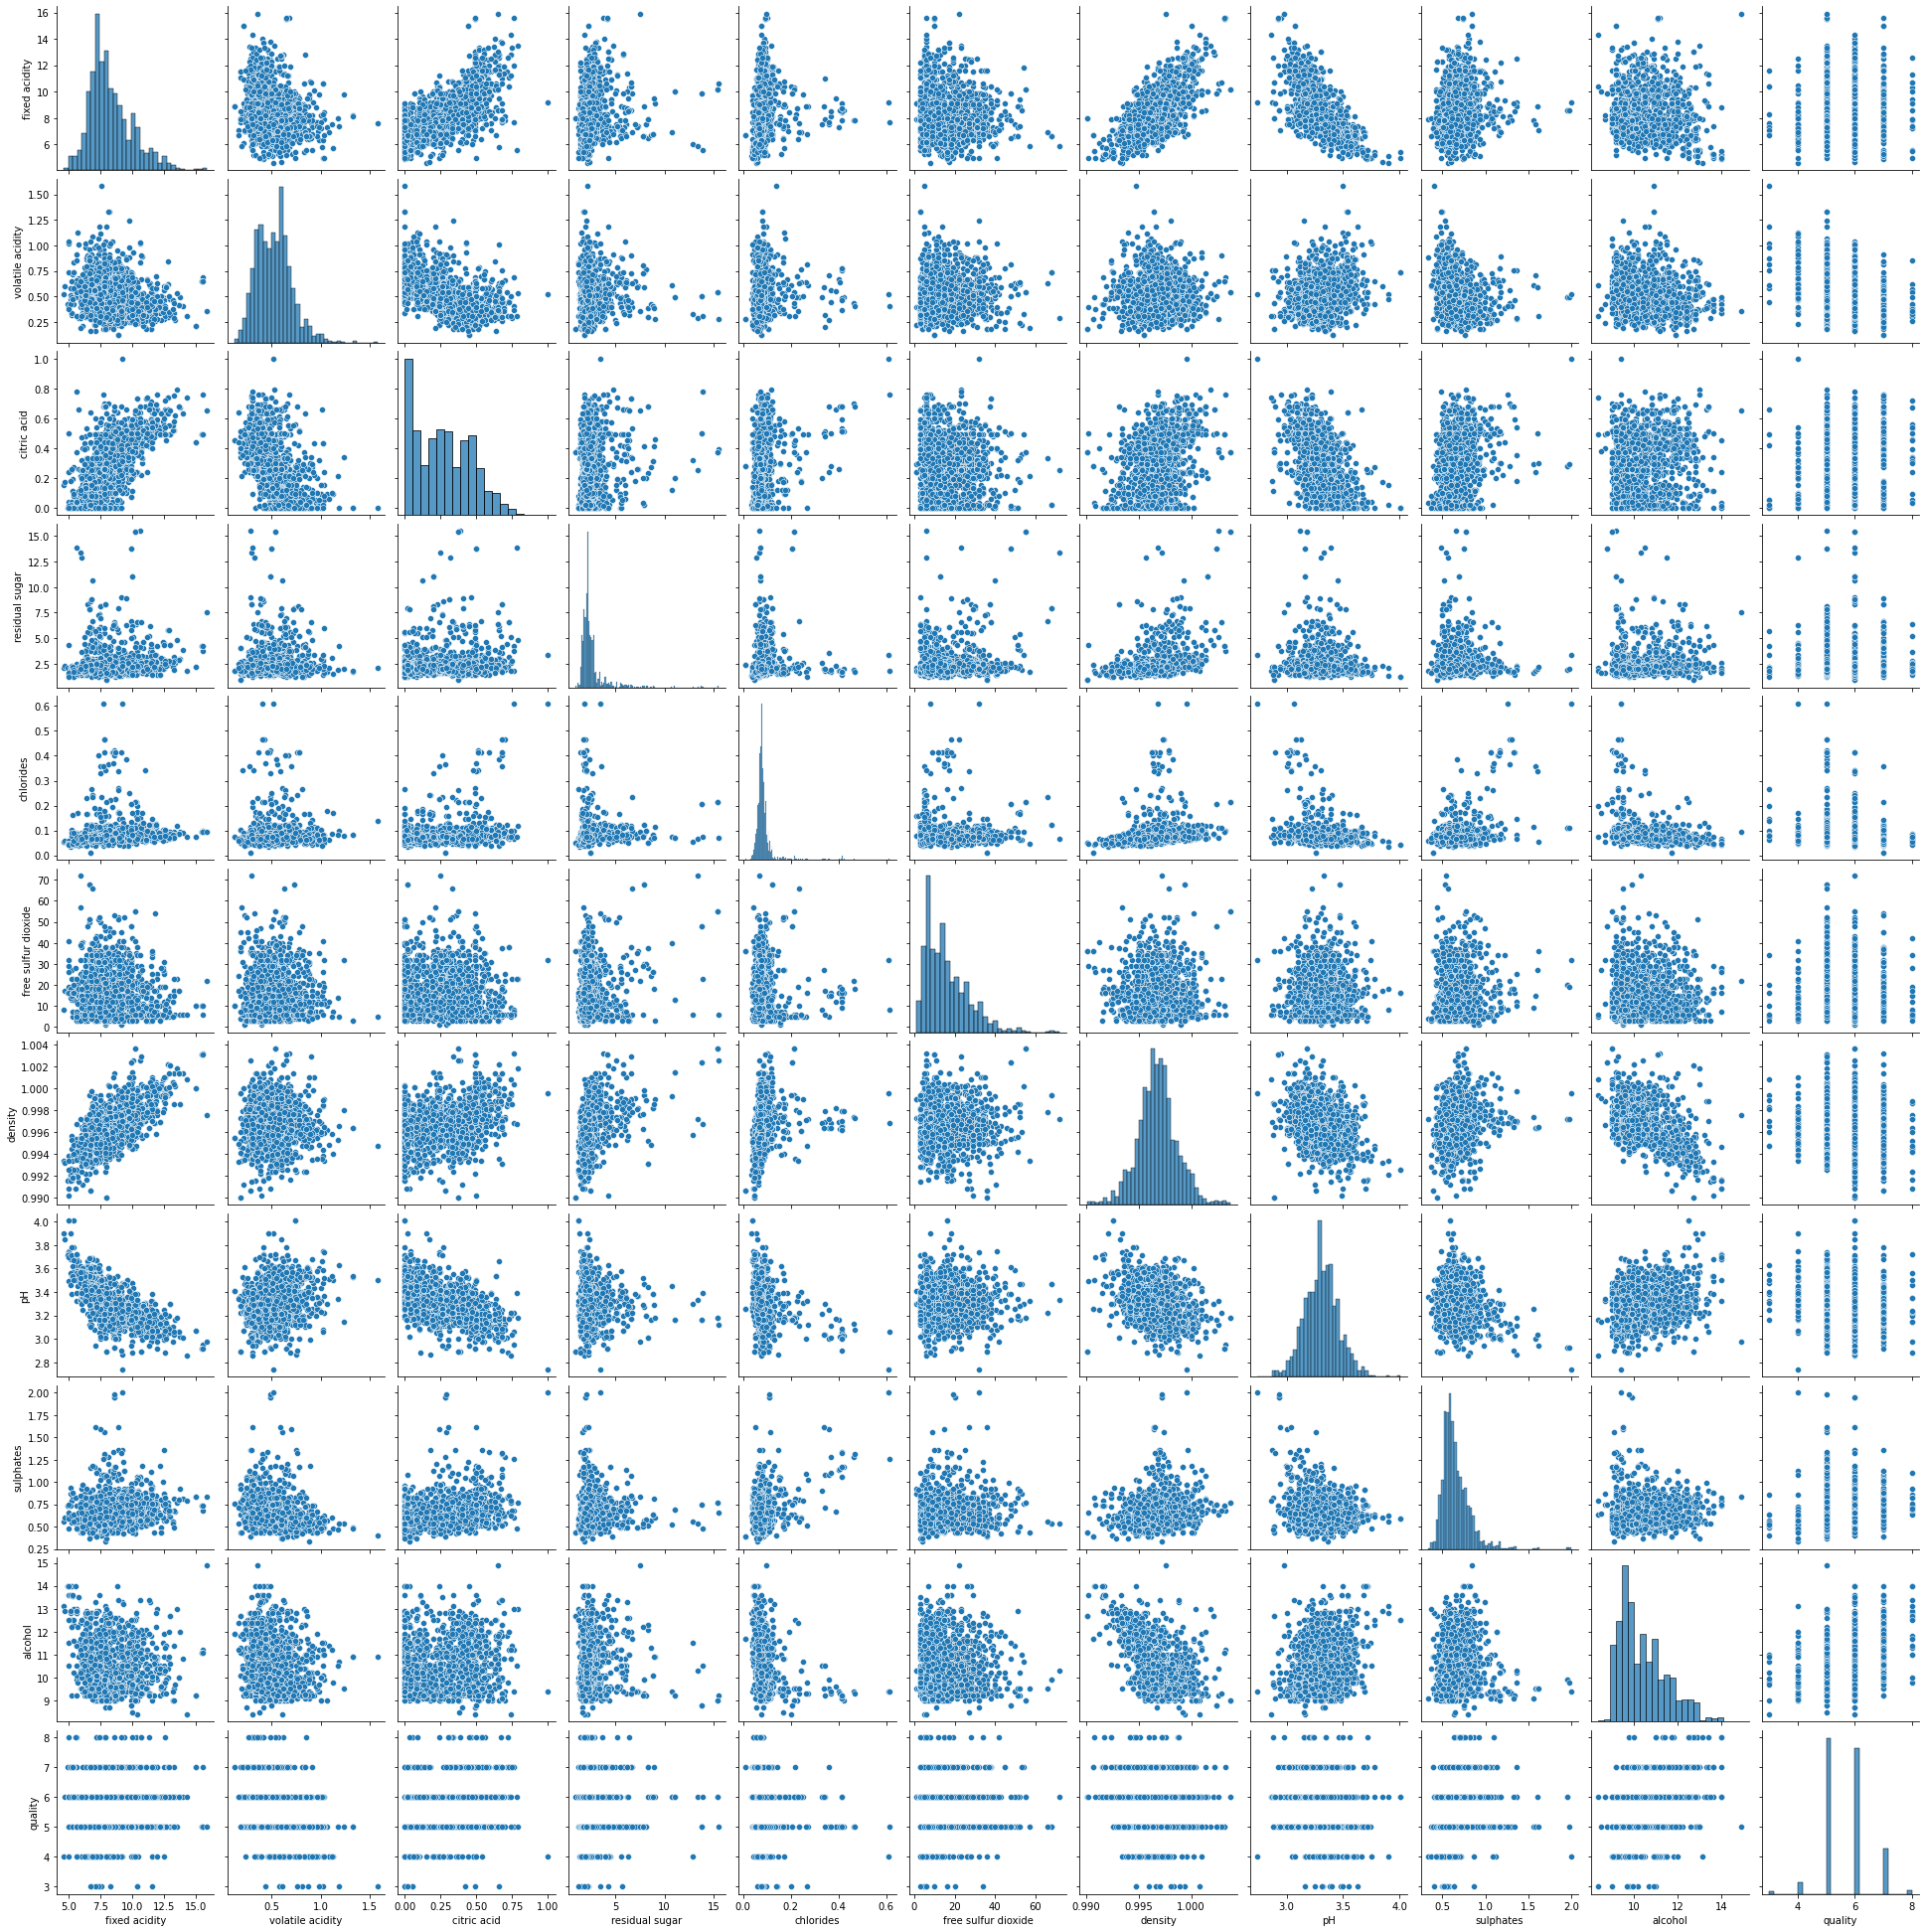

In [18]:
# plot pairplot
sb.pairplot(new_data)
#show graph
plt.show()

We see that there are not many null values are present in our data so we simply fill them with the help of the fillna() function.

In [19]:
new_data.update(new_data.fillna(new_data.mean()))
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


we handle only numerical variables value because, we fill mean() and mean value is not for categorical variables, so for categorical variables.

In [20]:
# catogerical vars 
next_data = pd.get_dummies(new_data,drop_first=True)
# display new dataframe
next_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [21]:
#Splitting dataset

from sklearn.model_selection import train_test_split

# "quality" column as numpy array.
y = data["quality"].values

# All data except "quality" column.
x = data.drop(["quality"], axis=1).values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

# Normalization

We do normalization on numerical data because our data is unbalanced it means the difference between the variable values is high so we convert them into 1 and 0.

In [22]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

[[0.33628319 0.41322314 0.12       ... 0.50393701 0.33532934 0.52307692]
 [0.3539823  0.4338843  0.25       ... 0.42519685 0.16167665 0.24615385]
 [0.47787611 0.19008264 0.45       ... 0.32283465 0.05988024 0.15384615]
 ...
 [0.23893805 0.43801653 0.         ... 0.51181102 0.08383234 0.24615385]
 [0.28318584 0.33884298 0.33       ... 0.44094488 0.16167665 0.16923077]
 [0.38938053 0.39669421 0.29       ... 0.47244094 0.14371257 0.24615385]]


# Applying Model

Random Forest Classifier

In [23]:
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()


# fit data
fit_rnd = rnd.fit(new_xtrain,y_train)

#predicting score
rnd_score = rnd.score(new_xtest,y_test)
print('score of model is : ',rnd_score)

# display error rate
print('calculating the error')



score of model is :  0.721875
calculating the error


In [24]:
# for error checking
from sklearn.metrics import mean_squared_error
 
# checking mean_squared error
MSE = mean_squared_error(y_test,y_train)
 
# checking root mean squared error
RMSE = np.sqrt(MSE)
 
print('mean squared error is : ',MSE)
 
print('root mean squared error is : ',RMSE)
 
print(classification_report(y_test,x_train))


ValueError: Found input variables with inconsistent numbers of samples: [320, 1279]

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 63.44%


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 73.44%


In [28]:
x_predict = list(rnd.predict(x_test))
predicted_data = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_data).head(20)

,predicted_values,original_values
0,5,7
1,5,5
2,5,6
3,5,7
4,5,6
5,5,5
6,5,6
7,5,7
8,5,5
9,5,6


In [29]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()

In [30]:
lg.fit(x_train,y_train)

LogisticRegression()

In [31]:
pred=lg.predict(x_test)
print(pred)

[6 5 6 6 5 6 6 6 5 5 6 6 6 6 5 6 6 5 5 5 5 5 5 5 6 5 6 5 6 5 5 6 5 5 5 6 7
 5 6 6 5 6 5 6 6 5 6 6 6 5 6 5 5 6 6 5 5 6 6 5 6 5 6 5 6 5 5 5 6 6 5 5 5 6
 6 5 5 6 6 6 6 6 6 5 6 5 6 5 6 5 5 6 6 5 6 5 5 6 6 5 5 6 5 6 6 6 6 5 5 6 7
 5 6 6 5 5 5 6 6 6 5 5 5 5 5 6 6 5 6 6 5 5 6 5 5 6 5 6 5 6 6 6 6 5 6 6 5 6
 6 6 6 6 5 6 6 5 5 6 6 5 6 5 6 6 6 5 6 5 6 5 5 6 6 5 5 5 6 5 5 5 6 6 5 6 5
 5 6 6 6 6 6 5 5 5 5 5 6 5 6 6 5 5 6 5 6 6 6 5 6 6 6 6 6 6 5 6 6 5 6 6 6 6
 5 5 6 6 5 5 5 5 5 5 6 6 6 6 6 5 5 5 6 6 6 5 6 6 6 6 6 5 6 5 5 5 5 6 6 5 6
 6 5 5 6 5 5 5 5 5 5 5 5 5 5 6 5 6 6 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 5 5
 5 5 5 5 6 6 6 6 5 5 5 6 6 6 5 5 5 5 6 6 6 5 6 6]


In [32]:
print("accuracy score:",accuracy_score(pred,y_test))

accuracy score: 0.5875


In [33]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,pred))

[[  0   0   3   0   0   0]
 [  0   0   7   1   0   0]
 [  0   0 104  32   0   0]
 [  0   0  39  84   2   0]
 [  0   0   2  40   0   0]
 [  0   0   0   6   0   0]]


AUC ROC CURVE

In [34]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [35]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.02171278, 0.02412297, 0.04511147, 0.02031397, 0.0407498 ,
       0.02004884, 0.00939574, 0.01293244, 0.02986437, 0.00903777,
       0.05592965, 0.03371347, 0.15621269, 0.00959431, 0.03713933,
       0.01066494, 0.05660717, 0.00979361, 0.03788978, 0.02690896,
       0.0086618 , 0.02631896, 0.0051964 , 0.01770771, 0.02159748,
       0.01179388, 0.02287753, 0.0239141 , 0.03257477, 0.01287503,
       0.02384518, 0.05330401, 0.01238542, 0.00273954, 0.03520985,
       0.06438813, 0.05066829, 0.02166389, 0.05968407, 0.01013911,
       0.00334648, 0.03380297, 0.00508586, 0.06142869, 0.00443742,
       0.02764468, 0.02068256, 0.01588409, 0.02441251, 0.01187558,
       0.01293244, 0.00966956, 0.01114854, 0.00418639, 0.04442079,
       0.0138955 , 0.01146955, 0.04876549, 0.04371201, 0.02159343,
       0.04511644, 0.01005365, 0.04229038, 0.00797986, 0.04561566,
       0.00772355, 0.04207273, 0.01820052, 0.02322283, 0.03424001,
       0.00681828, 0.01709868, 0.04661178, 0.08571905, 0.00706

In [2]:
import joblib
joblib.dump(rnd,"rnd.pkl")

NameError: name 'rnd' is not defined